In [10]:
import pandas as pd
url_data = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(url_data, delimiter='\t')

In [11]:
df

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [12]:
variables = df.columns[1:9]
df[variables] = df[variables].apply(lambda x: (x - x.mean()) / x.std())

In [13]:
# Get the training and test sets
Y_train = df.loc[df["train"]=="T", 'lpsa'].to_numpy()
X_train = df.loc[df["train"]=="T", variables].to_numpy()
print("Training set : n = {} samples and p = {} dimensions".format(X_train.shape[0],X_train.shape[1]))
Y_test = df.loc[df["train"]=="F", 'lpsa'].to_numpy()
X_test = df.loc[df["train"]=="F", variables].to_numpy()
print("Test set : n = {} samples and p = {} dimensions".format(X_test.shape[0], X_test.shape[1]))

Training set : n = 67 samples and p = 8 dimensions
Test set : n = 30 samples and p = 8 dimensions


<Axes: >

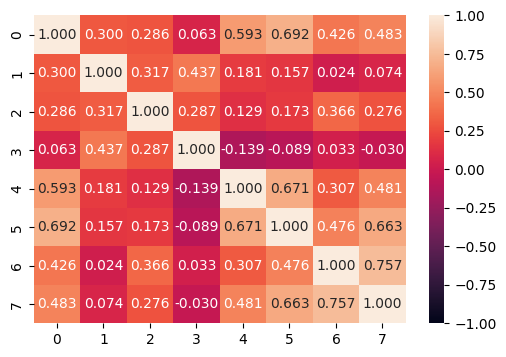

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
Xn = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
n, p = Xn.shape
C = Xn.T@Xn/n
# or C = np.corrcoef(X_train.T)
plt.figure(figsize=(6, 4))
sns.heatmap(C, annot=True, fmt=".3f", vmin=-1)

In [15]:
X = np.concatenate( (np.ones((X_train.shape[0],1)), X_train), axis=1)
b_ls = np.linalg.solve(X.T@X, X.T@Y_train)

In [16]:
n, p = X.shape
y_hat = X@b_ls
err = Y_train - y_hat

In [17]:
sigma_square = np.dot(Y_train - y_hat, Y_train - y_hat)/(n-p)
vector_v = np.diag(np.linalg.inv(X.T@X))
std_error_coef = np.sqrt(sigma_square * vector_v)

In [18]:
z_score = b_ls/(std_error_coef)

In [19]:
dash = '-' * 50
print(dash)
print("{:<11s}{:<15s}{:<13s}{:<10s}".format("Term", "Coef", "Std. error","Z score"))
print(dash)
for k in range(variables.shape[0]+1):
    if k==0:
        print("{:<10s}{:>12.2f}{:>12.2f}{:>12.2f}".format("Intercept", b_ls[k], std_error_coef[k], z_score[k]))
    else:
        print("{:<10s}{:>12.2f}{:>12.2f}{:>12.2f}".format(variables[k-1], b_ls[k], std_error_coef[k], z_score[k]))
print(dash)

--------------------------------------------------
Term       Coef           Std. error   Z score   
--------------------------------------------------
Intercept         2.46        0.09       27.60
lcavol            0.68        0.13        5.37
lweight           0.26        0.10        2.75
age              -0.14        0.10       -1.40
lbph              0.21        0.10        2.06
svi               0.31        0.12        2.47
lcp              -0.29        0.15       -1.87
gleason          -0.02        0.15       -0.15
pgg45             0.27        0.15        1.74
--------------------------------------------------


# Avec le chat

Bonjour ! Comment puis-je vous aider aujourd’hui ?11:38Je vais te donner des données d'entrainement et tu me resoud le probleme de regression avec la methode des moindres carrées. Je veux que tu me donne sous forme tableau les coefficient les std_error et les z_score de chaque caracteristique. La variable cible est 'lpsa' :  Voici les données url_data = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"11:42Je ne peux pas accéder directement à des URLs ou exécuter du code Python pour télécharger et traiter les données. Cependant, je peux t’expliquer comment résoudre un problème de régression linéaire par la méthode des moindres carrés, calculer les coefficients, les erreurs standards et les z-scores à partir de tes données, et te montrer comment obtenir le tableau souhaité.
Étapes à suivre :

Télécharger les données depuis l’URL donnée.
Préparer les données : séparer la variable cible (lpsa) des autres caractéristiques.
Ajouter une constante pour l’ordonnée à l’origine (intercept).
Estimer le modèle de régression linéaire (méthode des moindres carrés).
Extraire les coefficients, erreurs standards et z-scores.
Afficher les résultats sous forme de tableau.


Exemple de code Python (à exécuter de ton côté) :


In [32]:
#Resultat du chat

import pandas as pd
import statsmodels.api as sm

# 1. Télécharger les données
url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
data = pd.read_table(url, sep='\s+')

# 2. Préparer les données
X = data.drop(columns=['lpsa'])
X = sm.add_constant(X)  # Ajoute une constante pour l'intercept
y = data['lpsa']

# 3. Estimer le modèle
model = sm.OLS(y, X).fit()

# 4. Extraire les résultats
results = {
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'Std_Error': model.bse.values,
    'z_score': (model.params / model.bse).values
}

# 5. Afficher sous forme de tableau
df_results = pd.DataFrame(results)
print(df_results)


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15611/2483173539.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_table(url, sep='\s+')


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [31]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.7 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Le code du chat ne marche pas !!!!

# Calculer le Best_Subset et le Ridge

In [20]:
X = np.concatenate( (np.ones((X_train[:,:2].shape[0],1)), X_train[:,:2]), axis=1)
b_lsss = np.linalg.solve(X.T@X, X.T@Y_train)
print(f'Best Subset={b_lsss}')

Best Subset=[2.47735734 0.73971367 0.31632819]


In [28]:
def ridge(X,y,lambdaa):
    X_cent=X-X.mean()
    y_cent=y-y.mean()
    p=X.shape[1]
    I=np.eye(p)
    ridg=np.linalg.solve(X_cent.T@X_cent+lambdaa*I, X_cent.T@y_cent)
    intercep=y.mean()-X.mean(0).T@ridg
    return ridg,intercep

In [29]:
ridge(X_train,Y_train,24.25)

(array([ 0.419,  0.238, -0.045,  0.161,  0.227, -0.000,  0.039,  0.134]),
 np.float64(2.4635075851305226))

In [ ]:
import cvxpy as cp
Xn = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
Yn = (Y_train - Y_train.mean())/Y_train.std()
t = .7015
n, p = Xn.shape
b = cp.Variable(p)
o = cp.Minimize(cp.sum_squares(Xn@b-Yn))
c = [cp.norm(b, 1) <= t]
problem = cp.Problem(o, c)
problem.solve(solver=cp.SCS,eps=1e-5)
b_lasso = b.value*Y_train.std()/X_train.std(axis=0)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Estimation: ",b_lasso)

Estimation:  [ 0.533  0.169  0.000  0.002  0.094  0.000  0.000  0.000]
